# 1.Import  Necessary Librraries

In [1]:
#Data manipulation libraries : 
import numpy as np  
import pandas as pd 

# plotting:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

#math operations lib 
import math
from math import pi

#Splitting data to test and train 
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# 2.Import Dataset

In [2]:
data = pd.read_csv('Weather Forecast.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


# 3.Exploratory  Data Analysis

# 1.Initial Analysis

In [3]:
data.shape

(96453, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [6]:
# To find categorical Variable in data:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [7]:
# To find Quantitative Variable in data:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [8]:
# To check missing value
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# 2.Data Preprocessing

In [9]:
# In the data Precip type is object in that 517 is missing value
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [10]:
data.fillna(method='ffill', inplace=True)

In [11]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

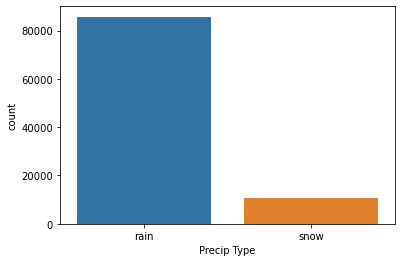

In [12]:
sns.countplot(x=data['Precip Type'])

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

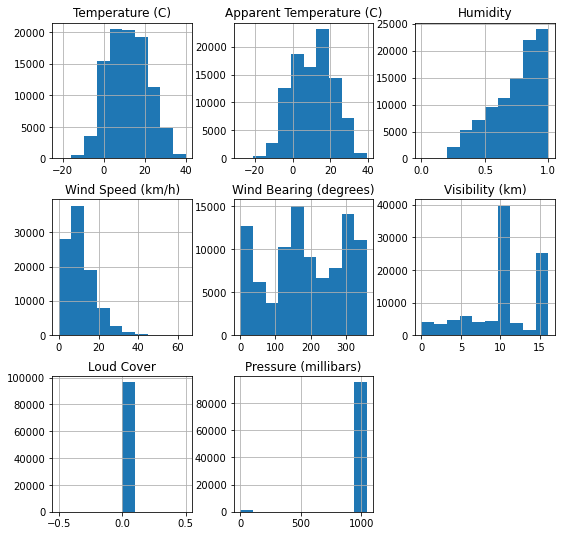

In [13]:
# To draw a Histogram:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

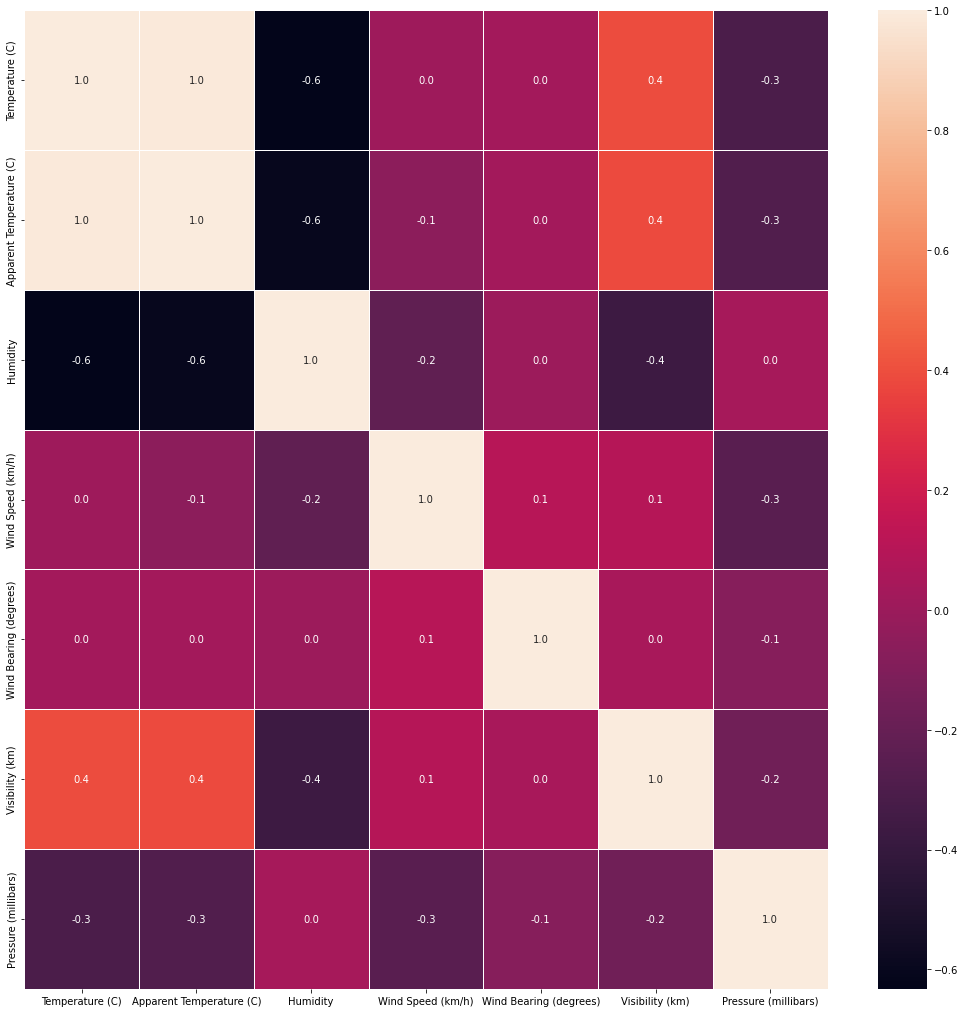

In [21]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
#Loud Cover' takes values zero. We drop it
data=data.drop('Loud Cover',axis=1)

 In "Pressure (millibars)"column Some observations are nil. It seems that they lack values. because the pressure does not take zero as value .Let's fill the zeros with the median:

<AxesSubplot:>

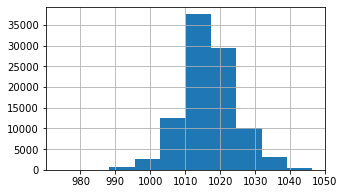

In [15]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()

<AxesSubplot:xlabel='count', ylabel='Summary'>

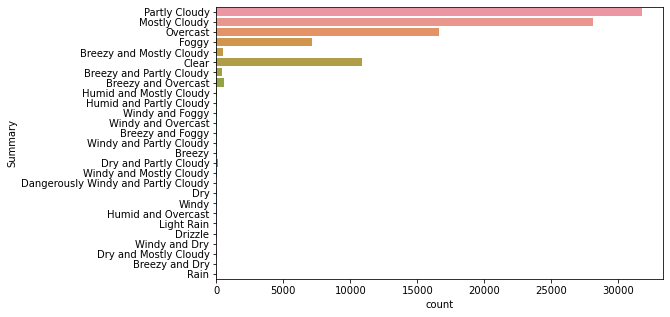

In [16]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [17]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [18]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

<Figure size 1296x576 with 0 Axes>

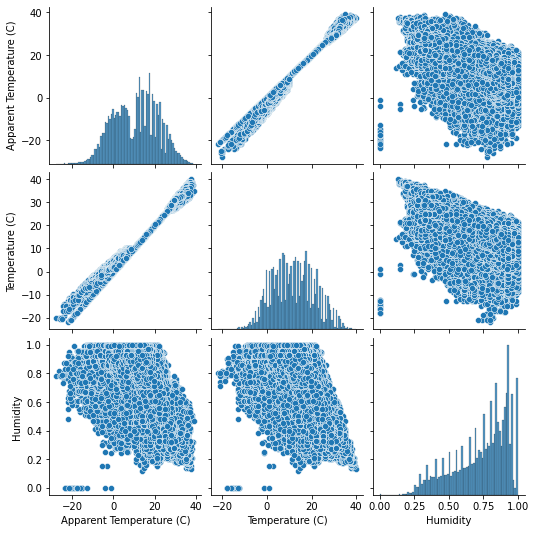

In [19]:
#To draw pairplot:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

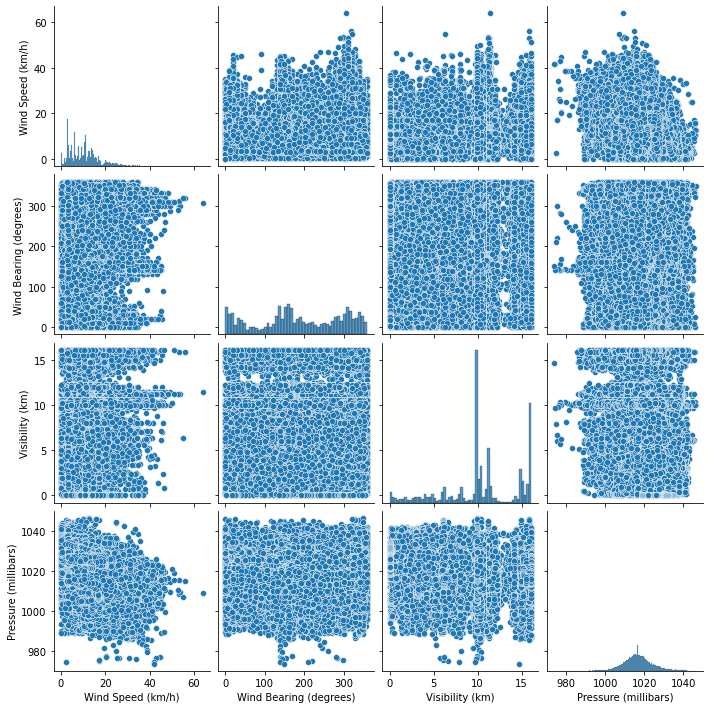

In [20]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

# Linear Regression

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()

In [23]:
X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

In [24]:
X

array([[0.89],
       [0.86],
       [0.89],
       ...,
       [0.56],
       [0.6 ],
       [0.61]])

In [25]:
y

array([[ 9.47222222],
       [ 9.35555556],
       [ 9.37777778],
       ...,
       [22.03888889],
       [21.52222222],
       [20.43888889]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [28]:
model.coef_

array([[-30.89438376]])

In [29]:
model.intercept_

array([34.63692913])

In [30]:
print(model.predict([[3.6]]))

[[-76.5828524]]


In [31]:
#model based on training and testing result 
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20)

In [32]:
model=LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [33]:
predictedr=model.predict(Xtest)
predictedr

array([[29.08722509],
       [21.35416086],
       [14.54906434],
       ...,
       [ 3.72277441],
       [ 7.12532268],
       [ 5.26938726]])

In [34]:
#overfitting and underfitting situation 
model.score(Xtrain,ytrain)*100

40.2104862808545

In [35]:
model.score(Xtest,ytest)*100

39.02447429771107

In [36]:
#evaluation process / accuracy score or standard error
#linear : residual = actual value-predicted value 
#Regression Evalution Metrics:
#1.MAE
#2.MSE
#3.RMSE

In [37]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest,predictedr))

6.073831585936668


In [38]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytest,predictedr))

55.48955933941543


In [39]:
import math
print(math.sqrt(mean_squared_error(ytest,predictedr)))

7.44913144866


In [41]:
# To check accuracy:
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, shuffle=True, random_state=0)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)
print("R2 = ",r2_score(y_test, y_pred))

R2 =  0.4004047204664315
